In [1]:
import numpy as np
import spec_flats as sf
import matplotlib.pyplot as plt

## Initialize butler and set up observation year to find flats 

In [2]:
#repo = '/repo/embargo_old'
#repo = '/repo/embargo'
repo = '/sdf/group/rubin/repo/main'
#calibCollections=['LATISS/calib/legacy','LATISS/raw/all']
calibCollections=['LATISS/calib','LATISS/raw/all']
obs_year = 2024
filter_ = 'SDSSz_65mm'
disperser = 'empty'

In [3]:
if filter_=='empty':
    save_plots = True
else:
    save_plots = False

In [4]:
outdir = '/home/m/monroy/rubin-user/spec_flats/wl_dependence/outputs/'
if os.path.exists(outdir)==False:
    os.mkdir(outdir)

In [5]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=obs_year,filter=filter_,disperser=disperser,repo=repo,calibCollections=calibCollections)

In [6]:
flat_dates

array([20240129, 20240131, 20240201, 20240207, 20240212, 20240216,
       20240219, 20240220, 20240221, 20240222, 20240223, 20240227,
       20240228, 20240301, 20240303, 20240305, 20240306, 20240308,
       20240311, 20240326, 20240327, 20240328, 20240329, 20240401,
       20240402, 20240403, 20240404, 20240408, 20240409, 20240410,
       20240415, 20240416, 20240417, 20240419, 20240422, 20240423,
       20240424, 20240429, 20240527, 20240528, 20240529, 20240530,
       20240603, 20240611, 20240618, 20240619, 20240625, 20240626,
       20240627, 20240703, 20240708, 20240709, 20240716, 20240717,
       20240722, 20240723, 20240724, 20240729, 20240730, 20240801,
       20240806, 20240807, 20240812, 20240813, 20240814, 20240819,
       20240820, 20240821])

In [7]:
#flat_ids

### Find closest date 

In [8]:
closest_date, closest_ids = sf.find_closest_date(20240417,flat_ids)

Requested observation date =  20240417
Closest date available =  20240417
Corresponding flat IDs =  [2024041700107 2024041700108 2024041700109 2024041700110 2024041700111
 2024041700112 2024041700113 2024041700114 2024041700115 2024041700116
 2024041700117 2024041700118 2024041700119 2024041700120 2024041700121
 2024041700122 2024041700123 2024041700124 2024041700125 2024041700126
 2024041700127]


### Check that the flats of a given date can be loaded 

In [9]:
sf.check_flats(closest_ids,return_flats=False,butler=butler)

Inspecting flats
All flats are equal


### Select a flat by ID and plot it 

In [10]:
#2024-04
#flat_id0 = 2024041700090 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
flat_id0 = 2024041700119 #SDSSz_65mm
#flat_id0 = 2024041700177 #empty
#2024-08
#flat_id0 = 2024080700162 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSSr_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
#flat_id0 = 2025010900127 #empty

In [11]:
assert flat_id0 in closest_ids

In [12]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2024041700119 properly loaded


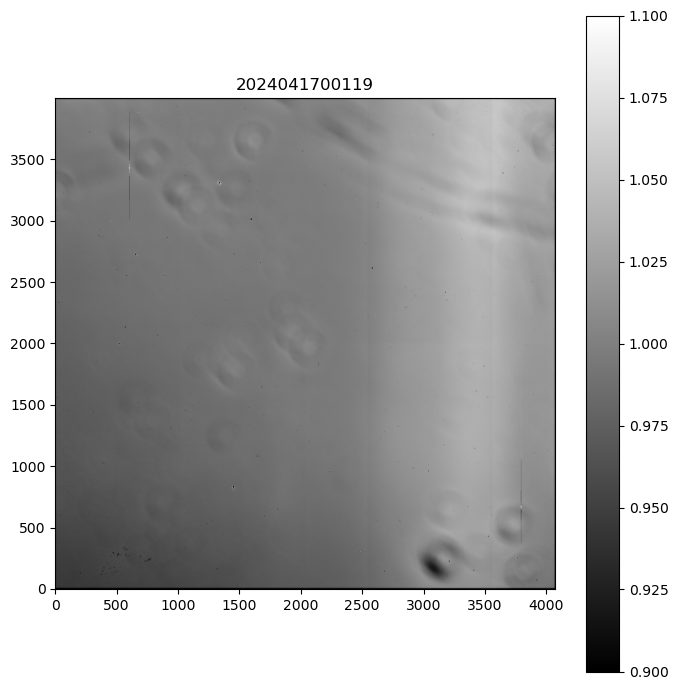

In [13]:
sf.plot_flat(flat_array_,title=flat_id0)

## Now we use the auxtel_flat class 

### We create an auxtel_flat object for a given flat ID 
We can reuse the butler that we initialized above or set up a different one 

In [14]:
myflat = sf.auxtel_flat(flat_id0,butler=butler)

### Plot flat with plot_flat() method 

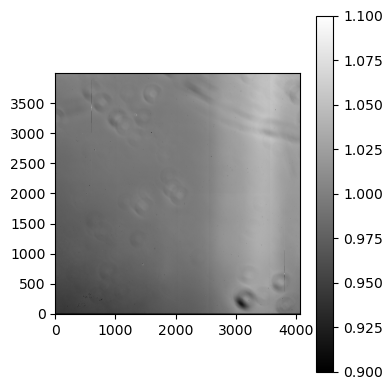

In [15]:
myflat.plot_flat(figsize=(4,4))

## Select testing amplifier

In [16]:
myflat.select_amplis('C12')

In [17]:
myflat.amplis_coords

{'C12': (1018, 1527, 2000, 4000)}

/tmp/ipykernel_2287/2401246882.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xticklabels)
/tmp/ipykernel_2287/2401246882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticklabels)


[Text(0, -250.0, '1750'),
 Text(0, 0.0, '2000'),
 Text(0, 250.0, '2250'),
 Text(0, 500.0, '2500'),
 Text(0, 750.0, '2750'),
 Text(0, 1000.0, '3000'),
 Text(0, 1250.0, '3250'),
 Text(0, 1500.0, '3500'),
 Text(0, 1750.0, '3750'),
 Text(0, 2000.0, '4000')]

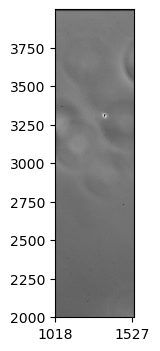

In [18]:
fig = plt.figure(figsize=(7,4))

test_ampli = myflat.amplis[0]

x0_ = myflat.amplis_coords[test_ampli][0]
x1_ = myflat.amplis_coords[test_ampli][1]
y0_ = myflat.amplis_coords[test_ampli][2]
y1_ = myflat.amplis_coords[test_ampli][3]

ax = fig.add_subplot(111)
ax.imshow(myflat.flat_array[y0_:y1_,x0_:x1_],origin='lower',vmin=0.95,vmax=1.05,cmap='grey')

new_xticklabels = list([0,myflat.amplis_coords[myflat.amplis[0]][0],myflat.amplis_coords[myflat.amplis[0]][1]])
ax.set_xticklabels(new_xticklabels)
new_yticklabels = [str(int(ylabel_)+myflat.amplis_coords[myflat.amplis[0]][2]) for ylabel_ in ax.get_yticks()]
ax.set_yticklabels(new_yticklabels)

In [19]:
yref = 3250
ytest = 2500
yfeat = 3305
xref = 1450
xtest = 1200

/tmp/ipykernel_2287/1526379150.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xticklabels)
/tmp/ipykernel_2287/1526379150.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticklabels)


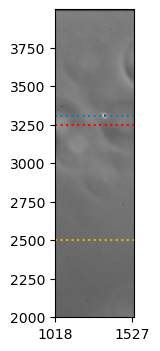

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(7,4))

test_ampli = myflat.amplis[0]

x0_ = myflat.amplis_coords[test_ampli][0]
x1_ = myflat.amplis_coords[test_ampli][1]
y0_ = myflat.amplis_coords[test_ampli][2]
y1_ = myflat.amplis_coords[test_ampli][3]

ax = fig.add_subplot(111)
ax.imshow(myflat.flat_array[y0_:y1_,x0_:x1_],origin='lower',vmin=0.95,vmax=1.05,cmap='grey')

new_xticklabels = list([0,myflat.amplis_coords[myflat.amplis[0]][0],myflat.amplis_coords[myflat.amplis[0]][1]])
ax.set_xticklabels(new_xticklabels)
new_yticklabels = [str(int(ylabel_)+myflat.amplis_coords[myflat.amplis[0]][2]) for ylabel_ in ax.get_yticks()]
ax.set_yticklabels(new_yticklabels)

#ax.axvline(xref-myflat.amplis_coords[myflat.amplis[0]][0],ls=':')
#ax.axvline(xtest-myflat.amplis_coords[myflat.amplis[0]][0],ls=':')
ax.axhline(yref-myflat.amplis_coords[myflat.amplis[0]][2],ls=':',color='r')
ax.axhline(ytest-myflat.amplis_coords[myflat.amplis[0]][2],ls=':',color='orange')
ax.axhline(yfeat-myflat.amplis_coords[myflat.amplis[0]][2],ls=':')

if save_plots:
    plt.savefig(os.path.join(outdir,'reference_amplifier_{0}.png'.format(myflat.amplis[0])))

### Tests on window size 

In [21]:
ws = np.arange(10,21)
ws

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [22]:
myflat.amplis_coords

{'C12': (1018, 1527, 2000, 4000)}

In [23]:
xrange_ = np.arange(myflat.amplis_coords[myflat.amplis[0]][0],myflat.amplis_coords[myflat.amplis[0]][1])

In [24]:

smooth_arrays_ref = {}
smooth_arrays_test = {}
smooth_arrays_feat = {}
for ws_ in ws:
    myflat.smooth_flat(window_size=ws_,sep_amplis='separate',normalize=False)
    smooth_arrays_ref[ws_] = [myflat.smooth_array[yref,xrange_]]
    smooth_arrays_test[ws_] = [myflat.smooth_array[ytest,xrange_]]
    smooth_arrays_feat[ws_] = [myflat.smooth_array[yfeat,xrange_]]
    

Normalized array not found. Normalizing it now
Window size for median smoothing = 10
Smoothing with median filter
Time for smoothing = 4.9010s
Window size for median smoothing = 11
Smoothing with median filter
Time for smoothing = 5.4538s
Window size for median smoothing = 12
Smoothing with median filter
Time for smoothing = 6.6505s
Window size for median smoothing = 13
Smoothing with median filter
Time for smoothing = 7.5022s
Window size for median smoothing = 14
Smoothing with median filter
Time for smoothing = 8.8070s
Window size for median smoothing = 15
Smoothing with median filter
Time for smoothing = 9.8693s
Window size for median smoothing = 16
Smoothing with median filter
Time for smoothing = 11.2901s
Window size for median smoothing = 17
Smoothing with median filter
Time for smoothing = 12.5137s
Window size for median smoothing = 18
Smoothing with median filter
Time for smoothing = 14.0025s
Window size for median smoothing = 19
Smoothing with median filter
Time for smoothing 

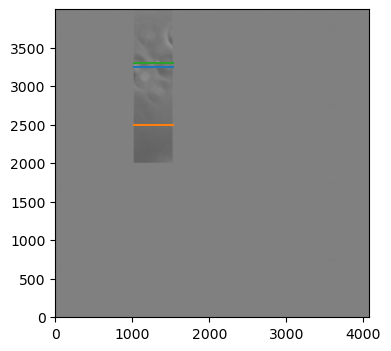

In [25]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.imshow(myflat.smooth_array,origin='lower',vmin=0.95,vmax=1.05,cmap='grey')
ax.plot(xrange_,np.ones(len(xrange_))*yref)
ax.plot(xrange_,np.ones(len(xrange_))*ytest)
ax.plot(xrange_,np.ones(len(xrange_))*yfeat)

### Comparison of window sizes 

### Test region 

In [26]:
def rmse(y0,ys):
    mse = (np.sum((y0-ys)**2.))/len(y0)
    rmse = np.sqrt(mse)
    return rmse

101


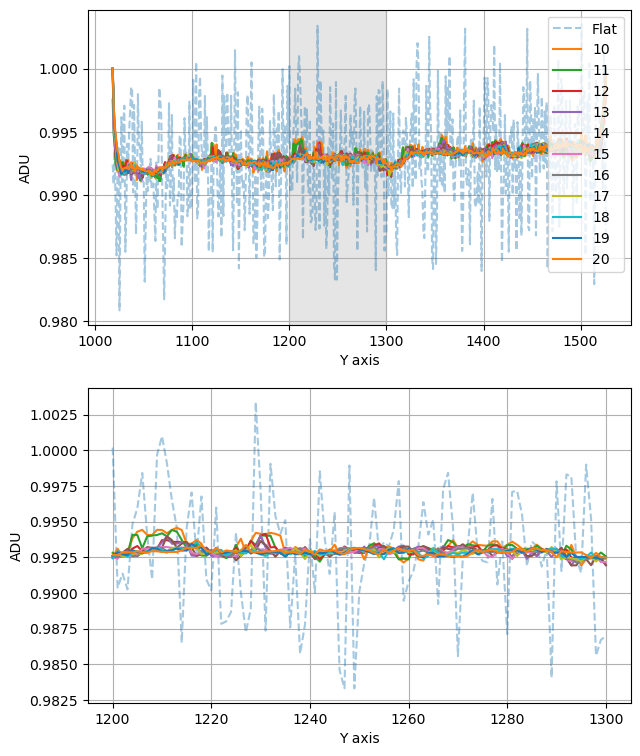

In [27]:

colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(211)


ax1.plot(xrange_,myflat.flat_array[ytest,xrange_],ls='--',alpha=0.4,label='Flat')

RMSE = []
for ws_ in ws:
    ax1.plot(xrange_,smooth_arrays_test[ws_][0],label=ws_)
    rmse_ = rmse(myflat.flat_array[ytest,xrange_],smooth_arrays_test[ws_][0])
    RMSE.append(rmse_)

#ax1.set_xlim(3000,3250)
#ax1.set_ylim(0.98,1.02)
ax1.grid()

ax1.set_xlabel('Y axis')
ax1.set_ylabel('ADU')

ax1.legend(loc="upper right")

x_min_zoom = 1200 
x_max_zoom = 1300 

mask = (xrange_ >= x_min_zoom) & (xrange_ <= x_max_zoom)
x_zoom = xrange_[mask]
print(len(x_zoom))

ax2 = fig.add_subplot(212)
ax2.plot(x_zoom, myflat.flat_array[ytest,x_zoom], ls='--', alpha=0.4)

for ws_ in ws:
    ax2.plot(x_zoom,smooth_arrays_test[ws_][0][mask],label=ws_)

ax2.grid()

ax2.set_xlabel('Y axis')
ax2.set_ylabel('ADU')


ax1.axvspan(x_min_zoom, x_max_zoom, color='gray', alpha=0.2, label='Región zoom')

if save_plots:
    plt.savefig(os.path.join(outdir,'test_region_windows.png'))


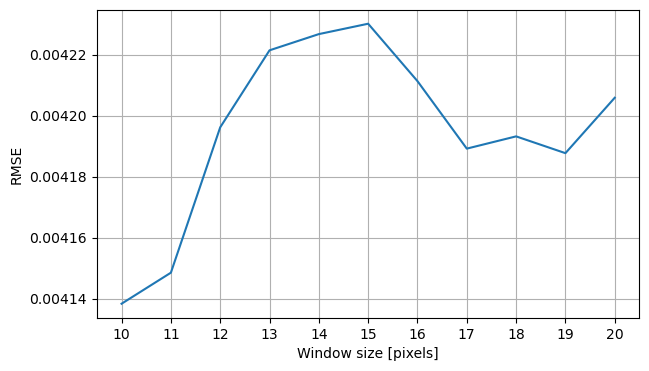

In [28]:
fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(111)
ax.plot(ws,RMSE)
ax.grid()

ax.set_xticks(ws)
ax.set_xlabel('Window size [pixels]')
ax.set_ylabel('RMSE')

if save_plots:
    plt.savefig(os.path.join(outdir,'rmse.png'))

### Select optimal window size 

In [29]:
sel_window = 15

In [30]:
ampli_median_ = np.median(myflat.flat_array)

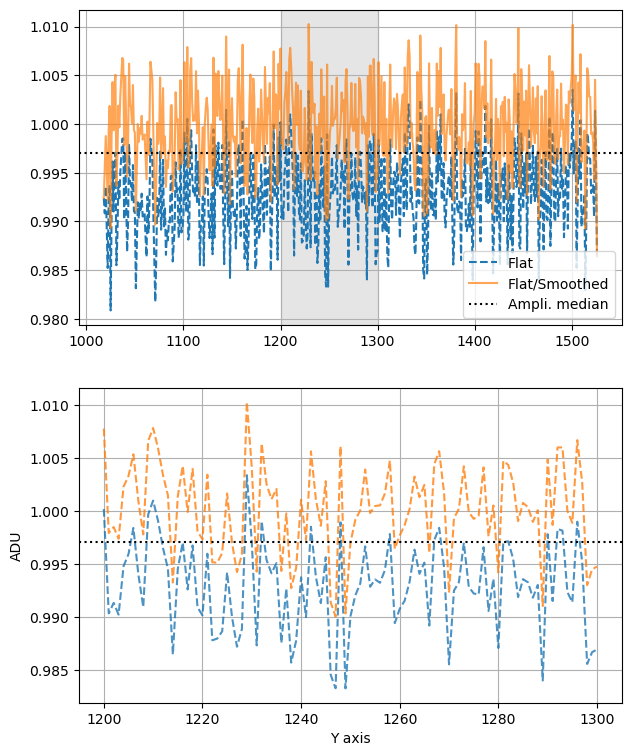

In [31]:

colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(211)

ax1.plot(xrange_,myflat.flat_array[ytest,xrange_],ls='--',label='Flat')
ax1.plot(xrange_,myflat.flat_array[ytest,xrange_]/smooth_arrays_test[sel_window][0],ls='-',alpha=0.7,label='Flat/Smoothed')
ax1.axhline(y=ampli_median_,ls=':',color='k',label='Ampli. median')

#ax1.set_xlim(3000,3250)
#ax1.set_ylim(0.98,1.02)
ax1.grid()

ax1.legend()

x_min_zoom = 1200 
x_max_zoom = 1300

mask = (xrange_ >= x_min_zoom) & (xrange_ <= x_max_zoom)
x_zoom = xrange_[mask]

ax2 = fig.add_subplot(212)
ax2.plot(x_zoom, myflat.flat_array[ytest,x_zoom], ls='--', alpha=0.8)
ax2.plot(x_zoom, myflat.flat_array[ytest,x_zoom]/smooth_arrays_test[sel_window][0][mask], ls='--', alpha=0.8)
ax2.axhline(y=ampli_median_,ls=':',color='k')

ax2.grid()

ax2.set_xlabel('Y axis')
ax2.set_ylabel('ADU')


ax1.axvspan(x_min_zoom, x_max_zoom, color='gray', alpha=0.2, label='Región zoom')

if save_plots:
    plt.savefig(os.path.join(outdir,'test_region_detrend.png'))


### Reference region 

101


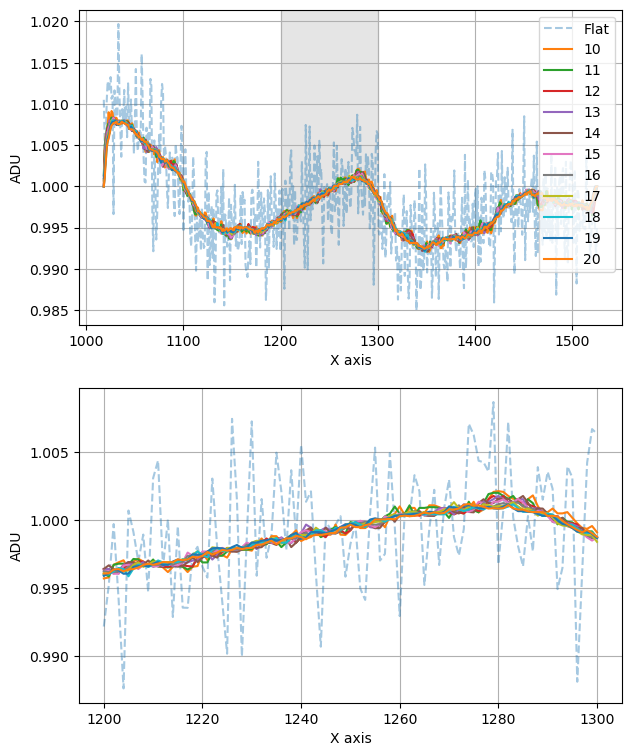

In [32]:

colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(211)

ax1.plot(xrange_,myflat.flat_array[yref,xrange_],ls='--',alpha=0.4,label='Flat')

for ws_ in ws:
    ax1.plot(xrange_,smooth_arrays_ref[ws_][0],label=ws_)

ax1.grid()

ax1.set_xlabel('X axis')
ax1.set_ylabel('ADU')

ax1.legend(loc="upper right")

x_min_zoom = 1200 
x_max_zoom = 1300 

mask = (xrange_ >= x_min_zoom) & (xrange_ <= x_max_zoom)
x_zoom = xrange_[mask]
print(len(x_zoom))

ax2 = fig.add_subplot(212)
ax2.plot(x_zoom, myflat.flat_array[yref, x_zoom], ls='--', alpha=0.4)

for ws_ in ws:
    ax2.plot(x_zoom,smooth_arrays_ref[ws_][0][mask],label=ws_)

ax2.grid()

ax2.set_xlabel('X axis')
ax2.set_ylabel('ADU')


ax1.axvspan(x_min_zoom, x_max_zoom, color='gray', alpha=0.2, label='Región zoom')

if save_plots:
    plt.savefig(os.path.join(outdir,'reference_region_windows.png'))


101


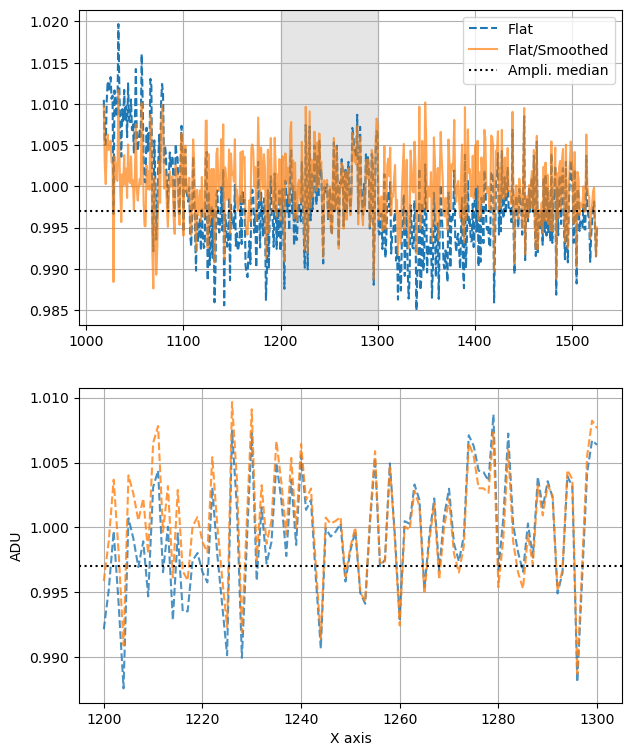

In [33]:
# Paleta de colores para las líneas
colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(211)

ax1.plot(xrange_,myflat.flat_array[yref,xrange_],ls='--',label='Flat')
ax1.plot(xrange_,myflat.flat_array[yref,xrange_]/smooth_arrays_ref[sel_window][0],ls='-',alpha=0.7,label='Flat/Smoothed')
ax1.axhline(y=ampli_median_,ls=':',color='k',label='Ampli. median')

ax1.grid()

ax1.legend()

x_min_zoom = 1200 
x_max_zoom = 1300

mask = (xrange_ >= x_min_zoom) & (xrange_ <= x_max_zoom)
x_zoom = xrange_[mask]
print(len(x_zoom))

ax2 = fig.add_subplot(212)
ax2.plot(x_zoom, myflat.flat_array[yref, x_zoom], ls='--', alpha=0.8)
ax2.plot(x_zoom, myflat.flat_array[yref, x_zoom]/smooth_arrays_ref[sel_window][0][mask], ls='--', alpha=0.8)
ax2.axhline(y=ampli_median_,ls=':',color='k')

ax2.grid()

ax2.set_xlabel('X axis')
ax2.set_ylabel('ADU')


ax1.axvspan(x_min_zoom, x_max_zoom, color='gray', alpha=0.2, label='Región zoom')

if save_plots:
    plt.savefig(os.path.join(outdir,'reference_region_detrend.png'))



### Feature region 

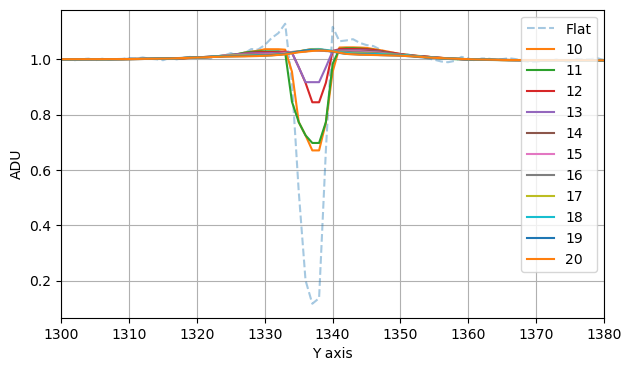

In [34]:

colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)


ax1.plot(xrange_,myflat.flat_array[yfeat,xrange_],ls='--',alpha=0.4,label='Flat')

for ws_ in ws:
    ax1.plot(xrange_,smooth_arrays_feat[ws_][0],label=ws_)

ax1.set_xlim(1300,1380)
#ax1.set_ylim(0.98,1.02)
ax1.grid()

ax1.set_xlabel('Y axis')
ax1.set_ylabel('ADU')

ax1.legend(loc="upper right")

if save_plots:
    plt.savefig(os.path.join(outdir,'feature_region_windows.png'))


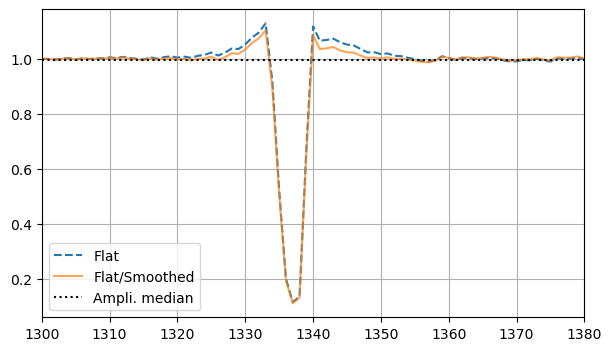

In [35]:

colors = plt.cm.cividis(np.linspace(0, 1, len(ws)))

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)

ax1.plot(xrange_,myflat.flat_array[yfeat,xrange_],ls='--',label='Flat')
ax1.plot(xrange_,myflat.flat_array[yfeat,xrange_]/smooth_arrays_feat[sel_window][0],ls='-',alpha=0.7,label='Flat/Smoothed')
ax1.axhline(y=ampli_median_,ls=':',color='k',label='Ampli. median')

ax1.set_xlim(1300,1380)
#ax1.set_ylim(0.98,1.02)
ax1.grid()

ax1.legend()

if save_plots:
    plt.savefig(os.path.join(outdir,'feature_region_detrend.png'))


### We create a smoothed flat 

This is independent of the normalizing step, that is, we can do it even if we haven't done myflat.normalize_flat(), it will be done internally by default (normalize = True, very fast operation) 

In [36]:
myflat.select_amplis('all')

In [37]:
myflat.normalize_flat()

Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median
Normalising by median


In [38]:
myflat.smooth_flat(window_size=sel_window,sep_amplis='together',kernel='median',mode='nearest',normalize=False)

Window size for median smoothing = 15
ATTENTION: doing median smoothing on all amplifiers TOGETHER
Smoothing with median filter
Time for smoothing = 49.8157s


In [39]:
myflat.window_size

15

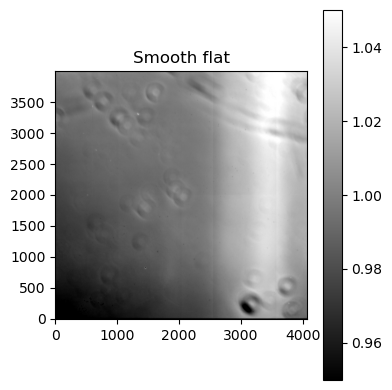

In [40]:
%matplotlib inline
myflat.plot_flat(show="smooth",vmin=0.95,vmax=1.05,figsize=(4,4),title='Smooth flat')

### Finally, we can create a spectroscopy or *special* flat 

This is also independent of the steps above: if myflat.smooth_array was not generated with myflat.smooth_flat, it will be done internally 

In [41]:
myflat.special_flat(kernel='median',sep_amplis='together',window_size=sel_window,mode='nearest',normalize=False,compensate_gain=False)

Window size for median smoothing = 15
Window size for median smoothing = 15
Using previously created smooth array


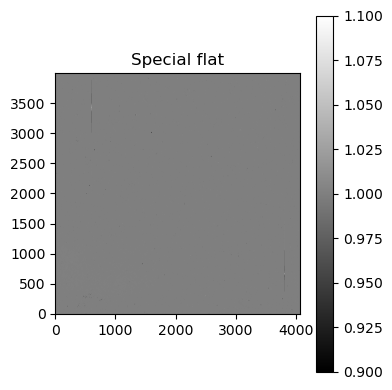

In [42]:
myflat.plot_flat(show="special",figsize=(4,4),title='Special flat')

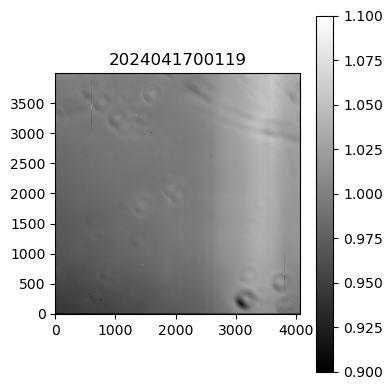

In [43]:
myflat.plot_flat(show="flat",figsize=(4,4),title='Original flat')

In [44]:
for ampli_ in myflat.amplis:
    
    x0_ = myflat.amplis_coords[ampli_][0]
    x1_ = myflat.amplis_coords[ampli_][1]
    y0_ = myflat.amplis_coords[ampli_][2]
    y1_ = myflat.amplis_coords[ampli_][3]
    
    median_0_ = np.median(myflat.flat_array[y0_:y1_,x0_:x1_])
    median_smooth_ = np.median(myflat.smooth_array[y0_:y1_,x0_:x1_])
    median_special_ = np.median(myflat.special_array[y0_:y1_,x0_:x1_])

    print(ampli_,median_smooth_)
    print(ampli_,median_0_,median_special_)
    

C10 0.989319920539856
C10 0.98890615 1.0000001511743761
C11 0.9928325414657593
C11 0.9929129 1.0
C12 0.9955629110336304
C12 0.9953967 1.0
C13 0.9966411590576172
C13 0.99661994 1.0
C14 0.9993599653244019
C14 0.9998174 1.0
C15 1.019203543663025
C15 1.018625 1.0
C16 1.0387861728668213
C16 1.0385606 1.0
C17 1.0297620296478271
C17 1.0299407 1.0000163126665087
C07 1.0169274806976318
C07 1.0160568 1.0000079623908835
C06 1.027709722518921
C06 1.0276365 1.0
C05 1.009159803390503
C05 1.009011 1.0
C04 0.9933932423591614
C04 0.99208957 1.0
C03 0.9877061247825623
C03 0.98702323 1.0
C02 0.9810373783111572
C02 0.98022044 1.0
C01 0.9738232493400574
C01 0.97340804 1.0
C00 0.9679076075553894
C00 0.96721673 1.0


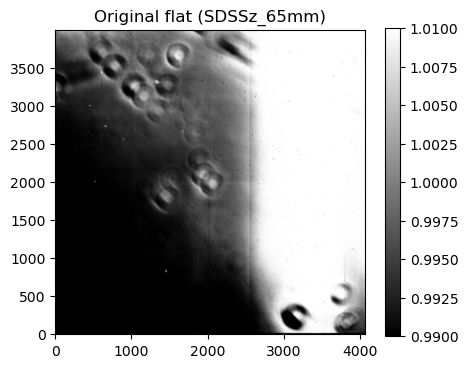

In [45]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

im = ax.imshow(myflat.flat_array,vmin=0.99,vmax=1.01,origin='lower',cmap='gray')
ax.set_title('Original flat ({0})'.format(filter_))
plt.colorbar(im,ax=ax)

plt.savefig(os.path.join(outdir,'original_flat_{0}.png'.format(filter_)))

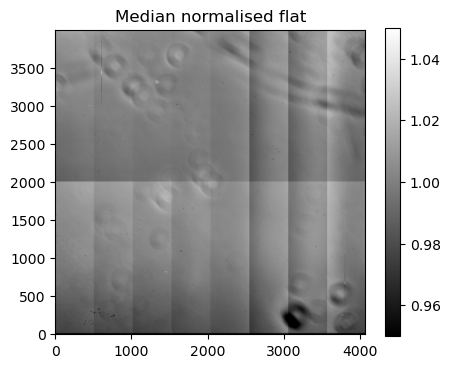

In [46]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

im = ax.imshow(myflat.norm_array,vmin=0.95,vmax=1.05,origin='lower',cmap='gray')
ax.set_title('Median normalised flat')
plt.colorbar(im,ax=ax)

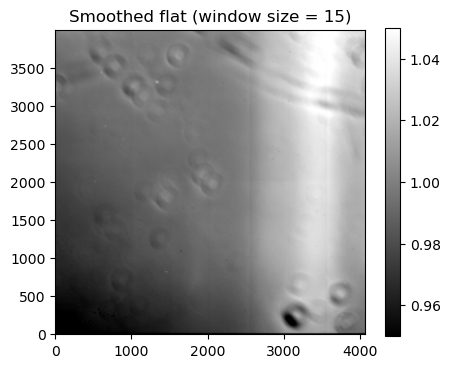

In [47]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

im = ax.imshow(myflat.smooth_array,vmin=0.95,vmax=1.05,origin='lower',cmap='gray')
ax.set_title('Smoothed flat (window size = {0})'.format(sel_window))
plt.colorbar(im,ax=ax)

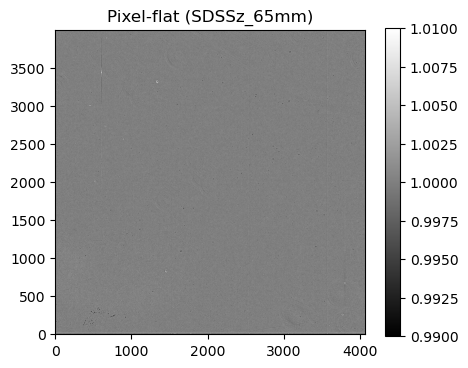

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

im = ax.imshow(myflat.special_array,vmin=0.99,vmax=1.01,origin='lower',cmap='gray')
ax.set_title('Pixel-flat ({0})'.format(filter_))
plt.colorbar(im,ax=ax)

plt.savefig(os.path.join(outdir,'pixel_flat_{0}.png'.format(filter_)))

In [49]:
outfile = 'pixel_flat_{0}_{1}-{2}.fits'.format(myflat.flat_id,filter_,disperser)

In [50]:
myflat.save('special',outfile,outdir)

>>>>  output filename pixel_flat_2024041700119_SDSSz_65mm-empty.fits


In [51]:
from astropy.io import fits
saved_flat = fits.open(os.path.join(outdir,outfile))

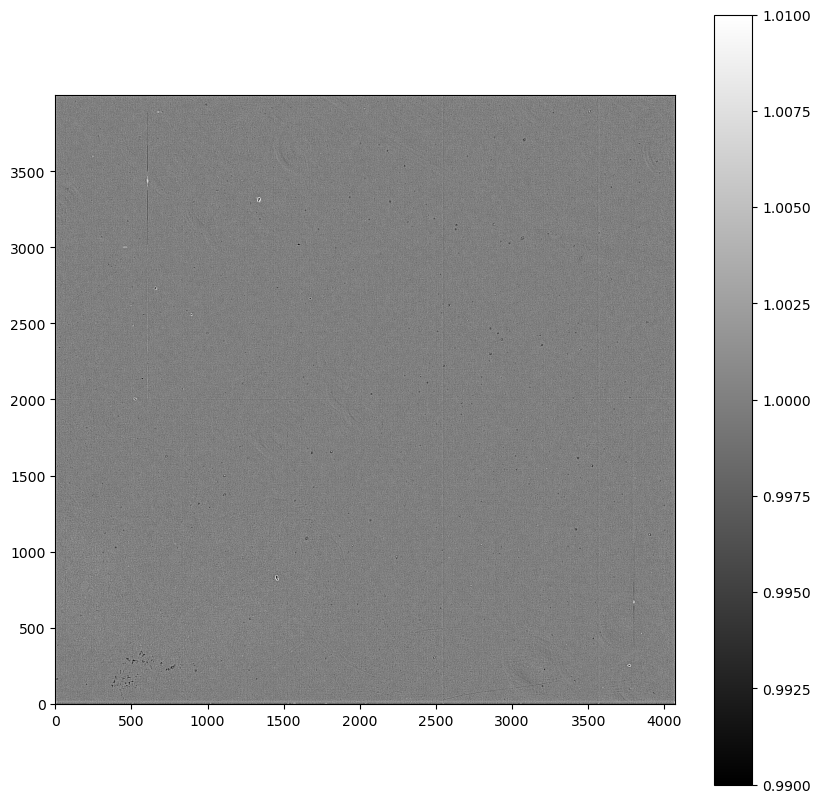

In [52]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(saved_flat[1].data,cmap="gray",origin='lower',vmin=0.99,vmax=1.01)
fig.colorbar(im,ax=ax)

In [53]:
for ampli_ in myflat.amplis:
    
    x0_ = myflat.amplis_coords[ampli_][0]
    x1_ = myflat.amplis_coords[ampli_][1]
    y0_ = myflat.amplis_coords[ampli_][2]
    y1_ = myflat.amplis_coords[ampli_][3]
    
    median_0_ = np.median(myflat.flat_array[y0_:y1_,x0_:x1_])
    median_smooth_ = np.median(myflat.smooth_array[y0_:y1_,x0_:x1_])
    median_special_ = np.median(myflat.special_array[y0_:y1_,x0_:x1_])

    #print(ampli_,median_smooth_)
    print(ampli_,median_0_,median_special_)
    print(median_0_-median_special_)
    

C10 0.98890615 1.0000001511743761
-0.011094006078550933
C11 0.9929129 1.0
-0.007087111473083496
C12 0.9953967 1.0
-0.004603326320648193
C13 0.99661994 1.0
-0.0033800601959228516
C14 0.9998174 1.0
-0.00018262863159179688
C15 1.018625 1.0
0.01862502098083496
C16 1.0385606 1.0
0.03856062889099121
C17 1.0299407 1.0000163126665087
0.02992441170635507
C07 1.0160568 1.0000079623908835
0.01604881365586941
C06 1.0276365 1.0
0.02763652801513672
C05 1.009011 1.0
0.009011030197143555
C04 0.99208957 1.0
-0.007910430431365967
C03 0.98702323 1.0
-0.012976765632629395
C02 0.98022044 1.0
-0.019779562950134277
C01 0.97340804 1.0
-0.026591956615447998
C00 0.96721673 1.0
-0.03278326988220215


(0.95, 1.05)

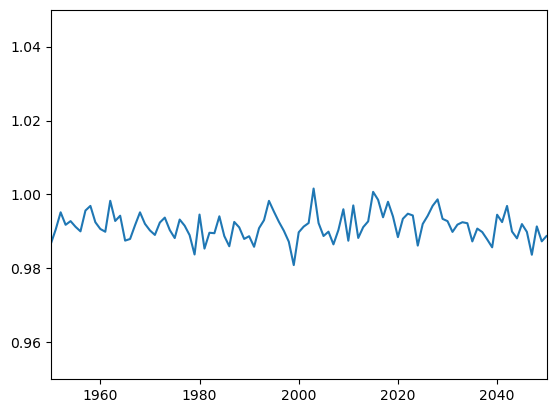

In [54]:
plt.plot(np.arange(4000),myflat.flat_array[:,1250],label='Original flat')
plt.xlim(1950,2050)
plt.ylim(0.95,1.05)

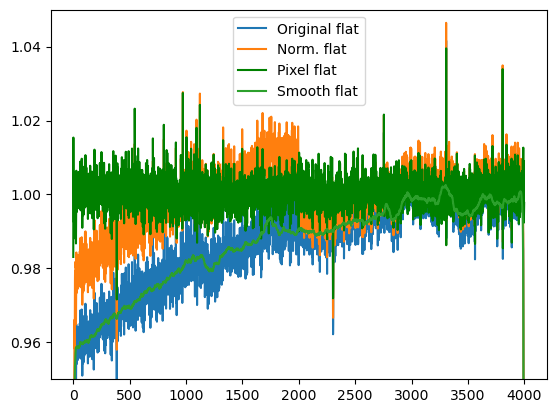

In [55]:
plt.plot(np.arange(4000),myflat.flat_array[:,1250],label='Original flat')
plt.plot(np.arange(4000),myflat.norm_array[:,1250],label='Norm. flat')
plt.plot(np.arange(4000),myflat.special_array[:,1250],color='g',label='Pixel flat')
plt.plot(np.arange(4000),myflat.smooth_array[:,1250],label='Smooth flat')
#plt.xlim(250,3750)
plt.ylim(0.95,1.05)
plt.legend()

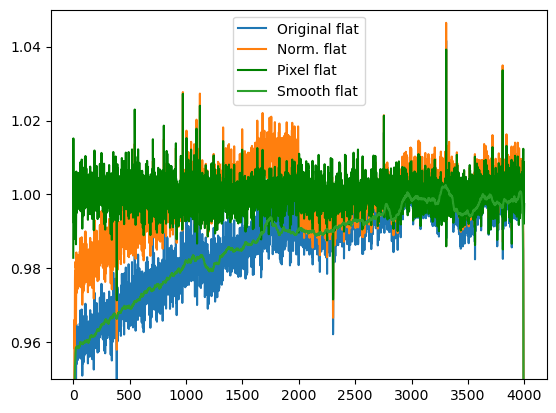

In [56]:
plt.plot(np.arange(4000),myflat.flat_array[:,1250],label='Original flat')
plt.plot(np.arange(4000),myflat.norm_array[:,1250],label='Norm. flat')
plt.plot(np.arange(2000),myflat.special_array[:2000,1250]/np.median(myflat.special_array[:2000,1250]),color='g',label='Pixel flat')
plt.plot(np.arange(2000,4000),myflat.special_array[2000:,1250]/np.median(myflat.special_array[2000:,1250]),color='g')
plt.plot(np.arange(4000),myflat.smooth_array[:,1250],label='Smooth flat')
#plt.xlim(250,3750)
plt.ylim(0.95,1.05)
plt.legend()

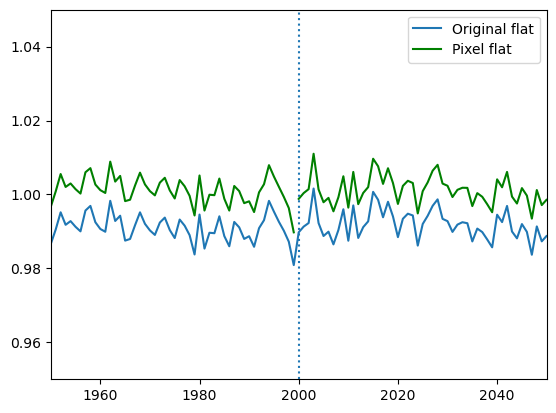

In [57]:
%matplotlib inline
plt.plot(np.arange(4000),myflat.flat_array[:,1250],label='Original flat')
#plt.plot(np.arange(4000),myflat.norm_array[:,1250],label='Norm. flat')
plt.plot(np.arange(2000),myflat.special_array[:2000,1250]/np.median(myflat.special_array[:2000,1250]),color='g',label='Pixel flat')
plt.plot(np.arange(2000,4000),myflat.special_array[2000:,1250]/np.median(myflat.special_array[2000:,1250]),color='g')
#plt.plot(np.arange(4000),myflat.smooth_array[:,1250],label='Smooth flat')
plt.axvline(x=2000,ls=':')
plt.xlim(1950,2050)
plt.ylim(0.95,1.05)
plt.legend()